In [12]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk87 import rk_error_control

In [13]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

def plot_shape_of_errors(continuous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continuous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name} - plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [14]:
def tol_experiment(tol, model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    (   res, 
        crk8_continous_sol,
        crk7_continous_sol,
        hb8_continous_sol,
        hb10_continous_sol) = rk_error_control(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp


    crk8_computed_solutions = [crk8_continous_sol.eval(x) for x in t_eval]
    hb8_computed_solutions = [hb8_continous_sol.eval(x) for x in t_eval]
    hb10_computed_solutions = [hb10_continous_sol.eval(x) for x in t_eval]
    actual_solutions = solution(t_eval)

    # plt.figure()
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    # plt.plot(t_eval, crk8_computed_solutions, label="crk8")
    # plt.plot(t_eval, hb8_computed_solutions, label="hb8")
    # plt.plot(t_eval, hb10_computed_solutions, label="hb10")
    # plt.plot(t_eval, actual_solutions, label="solution")
    # plt.title("solution vs interpolants")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    crk8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk8_computed_solutions, actual_solutions)]
    hb8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb8_computed_solutions, actual_solutions)]
    hb10_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb10_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, crk8_error, label="crk8 error")
    plt.plot(t_eval, hb8_error, label="hb8 error")
    plt.plot(t_eval, hb10_error, label="hb10 error")
    plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # plot_shape_of_errors(crk8_continous_sol, solution, "crk8")
    # plot_shape_of_errors(hb8_continous_sol , solution, "hb8")
    # plot_shape_of_errors(hb10_continous_sol , solution, "hb10")

    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

def experiment(model, y0, tspan, solution):
    for tol in [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12]:
        tol_experiment(tol, model, y0, tspan, solution)

nsteps = 7
nsuccessful_steps = 7
integration complete


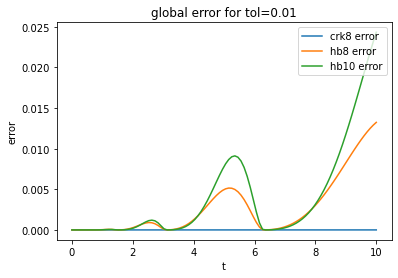

0.0
1.1102230246251565e-15
2.6267876762631204e-13
4.302402878408884e-11
2.257491638069098e-09
3.3524143849827936e-08
1.677618421958016e-07
3.891422974966474e-07
nsteps = 10
nsuccessful_steps = 10
integration complete


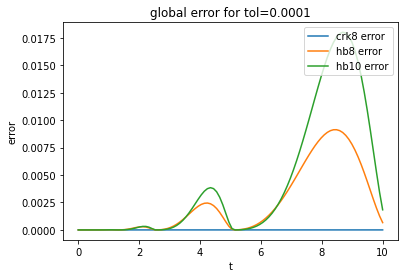

0.0
1.1102230246251565e-16
0.0
2.220446049250313e-16
1.4432899320127035e-15
1.687538997430238e-14
4.448885704277927e-12
4.0841563464510955e-10
1.0764960256537393e-08
8.568925258245486e-08
2.7172081101811685e-07
nsteps = 14
nsuccessful_steps = 14
integration complete


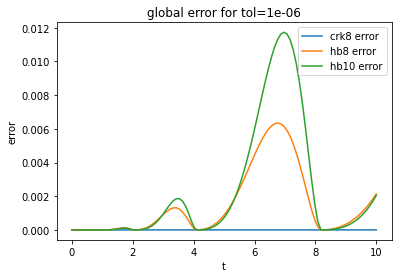

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
6.661338147750939e-16
3.774758283725532e-15
7.631673071273326e-13
1.0214251666695873e-10
4.127976072076933e-09
4.795599745088808e-08
1.9942213402845965e-07
4.104916118963242e-07
nsteps = 19
nsuccessful_steps = 19
integration complete


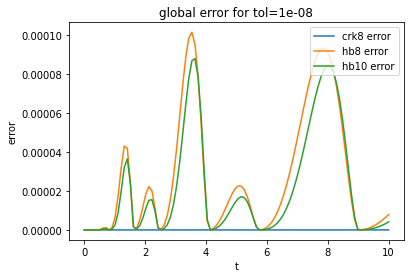

0.0
1.1102230246251565e-16
0.0
0.0
0.0
2.220446049250313e-16
2.220446049250313e-16
1.1102230246251565e-16
2.220446049250313e-16
0.0
4.440892098500626e-16
4.440892098500626e-16
1.2401191185062999e-13
2.3613777599962305e-11
1.4361217770542112e-09
9.901520714450385e-10
2.225795769916772e-09
1.4983598806139753e-09
2.3655910008635317e-09
1.5751669968366855e-09
nsteps = 27
nsuccessful_steps = 26
integration complete


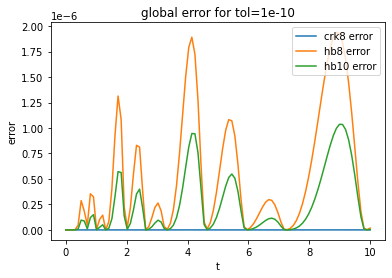

0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
2.220446049250313e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
2.220446049250313e-16
2.220446049250313e-16
4.440892098500626e-16
1.1102230246251565e-15
2.5202062658991053e-14
4.888867088936877e-12
4.214628646082019e-12
3.4271474547153957e-12
1.6845524974939963e-11
1.3585133018523265e-11
1.07224229495273e-11
2.991956682407704e-11
2.325351022847144e-11
1.8073320617872923e-11
3.6432523664586824e-11
2.7730484575272385e-11
nsteps = 50
nsuccessful_steps = 39
integration complete


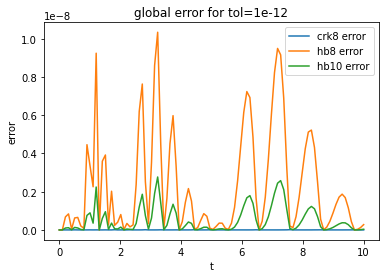

0.0
0.0
1.1102230246251565e-16
2.220446049250313e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
7.66053886991358e-15
3.219646771412954e-15
3.9968028886505635e-15
3.9968028886505635e-15
3.552713678800501e-15
2.786659791809143e-14
3.1530333899354446e-14
2.90878432451791e-14
2.708944180085382e-14
2.5091040356528538e-14
2.1649348980190553e-14
5.0182080713057076e-14
4.979350265443827e-14
4.529709940470639e-14
4.030109579389318e-14
3.419486915845482e-14
2.892130979148533e-14
5.3179682879545e-14
5.256906021600116e-14
4.7628567756419216e-14
4.1300296516055823e-14
3.6637359812630166e-14


In [15]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 8
nsuccessful_steps = 8
integration complete


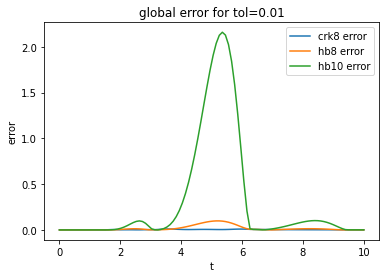

0.0
1.2212453270876722e-15
1.9202639478521633e-11
4.484805571358663e-08
1.1140335127335366e-05
0.00221504376280042
0.006031825078156267
0.0010586168791703043
0.00014833551554262886
nsteps = 11
nsuccessful_steps = 11
integration complete


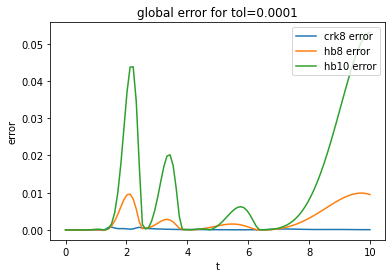

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
2.301603352350412e-12
4.418183818799548e-09
5.35362822962071e-07
0.00047260903249674024
0.0001086571230392297
3.5817712135476076e-05
0.00013912429001399548
nsteps = 17
nsuccessful_steps = 16
integration complete


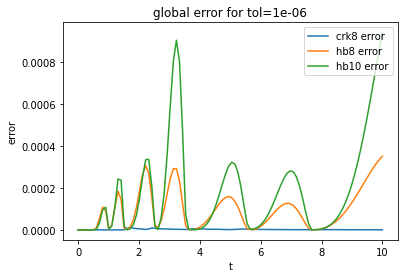

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.4876988529977098e-13
5.201292729850593e-10
4.453000090887116e-08
4.0991061878159485e-08
6.803730033533295e-06
2.052572071489789e-06
2.9346678780753366e-06
8.769315064070804e-07
5.548019331872225e-07
nsteps = 28
nsuccessful_steps = 24
integration complete


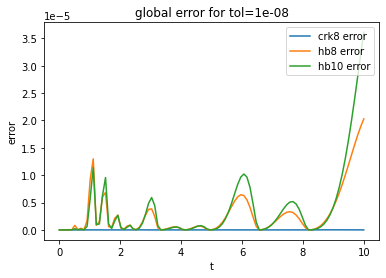

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
0.0
8.104628079763643e-15
4.614675308545202e-11
6.184253109609017e-11
4.8774650984739765e-11
3.109368040821181e-09
2.137366006405017e-09
1.1403266386711408e-09
6.258786822144202e-10
3.168393672425829e-09
1.4494664218878128e-09
7.26155927055494e-10
1.7901687979215986e-09
7.683929551666191e-10
7.484661182499686e-09
nsteps = 49
nsuccessful_steps = 38
integration complete


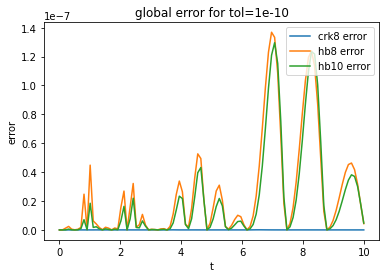

0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
3.3306690738754696e-16
3.295697048599777e-12
2.9680702340328935e-12
2.6317836798739336e-12
2.3028245976774997e-12
2.934763543294139e-12
2.5540680681501726e-12
1.9702017794998028e-12
1.4659384817150567e-12
1.0746958878371515e-12
7.87370169064161e-13
5.786482404346316e-13
4.3029468876909505e-13
9.42940170389761e-13
5.938305402963806e-13
3.5262071040875753e-13
2.2172541580545158e-13
1.4935275238769918e-13
1.1533968224952673e-12
6.611447500581846e-13
3.8077874187081306e-13
2.359952511188368e-13
3.151146010793582e-12
1.759717371818681e-12
1.0050849041931542e-12
nsteps = 82
nsuccessful_steps = 60
integration complete


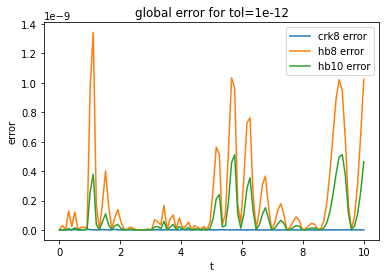

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
3.3306690738754696e-16
1.5543122344752192e-15
1.9984014443252818e-15
3.3306690738754696e-15
2.220446049250313e-15
2.220446049250313e-15
2.220446049250313e-16
4.440892098500626e-16
1.1102230246251565e-15
3.3306690738754696e-16
3.3306690738754696e-16
8.271161533457416e-15
1.0047518372857667e-14
1.3711254354120683e-14
1.2378986724570495e-14
5.551115123125783e-15
3.3861802251067274e-15
2.498001805406602e-16
8.049116928532385e-16
1.6375789613221059e-15
3.608224830031759e-16
8.881784197001252e-16
1.0824674490095276e-15
6.106226635438361e-16
7.494005416219807e-16
2.6645352591003757e-15
5.176414852314792e-15
3.372302437298913e-15
3.6914915568786455e-15
2.22738494

In [16]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 7
nsuccessful_steps = 7
integration complete


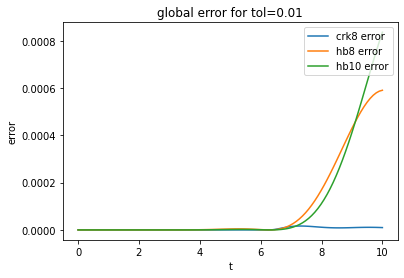

0.0
0.0
8.881784197001252e-16
2.4424906541753444e-15
2.1538326677728037e-14
9.601208716958354e-13
5.118190316011351e-10
9.753798655864898e-06
nsteps = 10
nsuccessful_steps = 10
integration complete


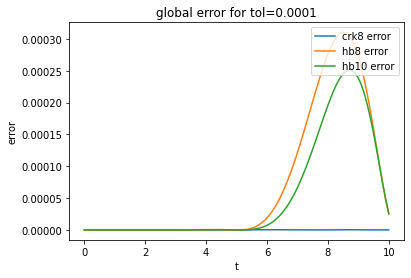

0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
8.881784197001252e-16
1.9984014443252818e-15
7.771561172376096e-15
1.3589129821411916e-13
6.456479795247105e-11
1.5379441364871127e-07
nsteps = 15
nsuccessful_steps = 14
integration complete


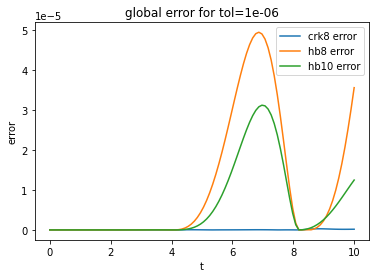

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
1.1102230246251565e-15
2.6645352591003757e-15
9.325873406851315e-15
8.076650459543089e-12
4.706611100857572e-09
1.66571375359581e-07
nsteps = 24
nsuccessful_steps = 20
integration complete


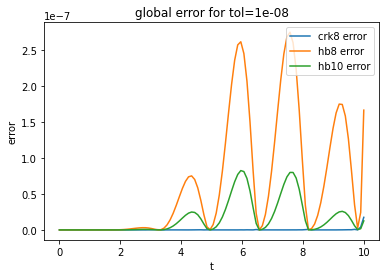

0.0
0.0
0.0
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
4.440892098500626e-16
2.220446049250313e-16
2.220446049250313e-16
5.329070518200751e-15
1.5543122344752192e-15
1.1102230246251565e-12
1.5591972157835698e-12
2.815525590449397e-13
4.490630090003833e-12
5.6203930398623925e-12
2.740594240435712e-08
nsteps = 25
nsuccessful_steps = 24
integration complete


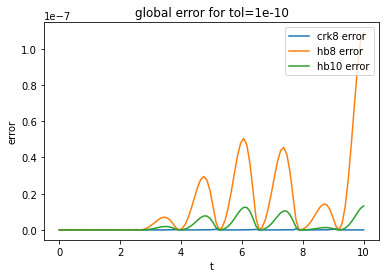

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
4.440892098500626e-16
0.0
0.0
2.220446049250313e-15
7.549516567451064e-15
1.6364687382974807e-13
3.836930773104541e-13
3.6903813338540203e-13
1.270095140171179e-13
3.7214675785435247e-13
8.055778266680136e-13
5.986322548778844e-13
nsteps = 53
nsuccessful_steps = 37
integration complete


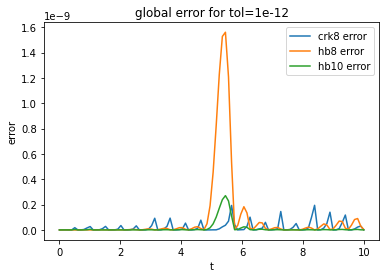

0.0
0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
0.0
4.440892098500626e-16
2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
6.661338147750939e-16
4.440892098500626e-16
8.881784197001252e-16
2.220446049250313e-15
7.549516567451064e-15
7.549516567451064e-15
1.6209256159527285e-14
2.864375403532904e-14
3.064215547965432e-14
3.108624468950438e-14
1.2878587085651816e-14
2.398081733190338e-14
1.3322676295501878e-15
2.6645352591003757e-15
9.769962616701378e-15
1.7763568394002505e-15
1.4210854715202004e-14
1.7763568394002505e-14
1.4210854715202004e-14
1.865174681370263e-14
7.993605777301127e-15
5.329070518200751e-15


In [17]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 367
nsuccessful_steps = 189
integration complete


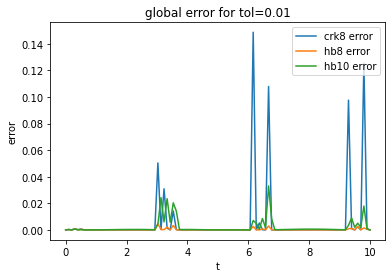

0.0
0.0018534297633654787
0.0003192922075723331
5.5302855517913585e-05
1.2718580153836534e-05
0.001223475877490554
0.0002126076076202077
4.486372120571236e-05
0.0012293977521743993
0.00022932413184617584
3.0287535142559108e-05
1.6961030449569314e-05
9.376819676387704e-06
1.1554495708332446e-05
1.1955675287778078e-05
1.263908855542173e-05
1.3235167928615788e-05
1.380812177742552e-05
1.4344784479369821e-05
1.4845910170424581e-05
1.5309872249624767e-05
1.5735577613473772e-05
1.6121950474290436e-05
1.6468027176919087e-05
1.677294230062465e-05
1.7035933891129673e-05
1.7256344411520352e-05
1.7433623128115805e-05
1.756732686108986e-05
1.7657121415770582e-05
1.7702782368900216e-05
1.7704195574008708e-05
1.7661357514797693e-05
1.757437526073158e-05
1.7443466222788473e-05
1.7268957606786373e-05
1.705128560236524e-05
1.6790994214033184e-05
1.6488734126962612e-05
1.6145260768984926e-05
1.5761432696992372e-05
1.5338209253368262e-05
1.4876648251282987e-05
1.4377903377549295e-05
1.3843221231435443e-0

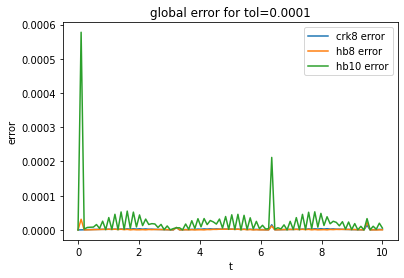

0.0
1.235968770905982e-10
4.334089736407476e-08
8.493296178226084e-06
5.3785904452485767e-08
1.890365745049749e-07
2.713148934407883e-07
3.5021222474784786e-07
4.284952725419622e-07
5.060918293886552e-07
5.828787975059591e-07
6.58733205149975e-07
7.335338327862928e-07
8.071608741389014e-07
8.794966928071801e-07
9.504255127357197e-07
1.0198337938582824e-06
1.0876106704138522e-06
1.1536475470474983e-06
1.2178387854833161e-06
1.2800817765779016e-06
1.3402769181158902e-06
1.3983279020246542e-06
1.4541418412727936e-06
1.5076295040161725e-06
1.5587052111243338e-06
1.6072874122752268e-06
1.653298220216648e-06
1.696664124861691e-06
1.7373157361610936e-06
1.7751880037053525e-06
1.8102203828140873e-06
1.8423567843539601e-06
1.8715457881235409e-06
1.897740709577711e-06
1.9208996674402457e-06
1.940985594472977e-06
1.957966365706554e-06
1.9718147913350137e-06
1.9825087316238665e-06
1.990031097909295e-06
1.994369825952802e-06
1.995518002284591e-06
1.99347378004866e-06
1.9882404014293087e-06
1.979826

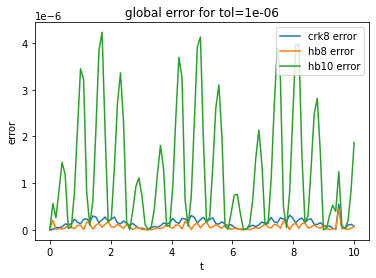

0.0
3.7947076036992655e-19
6.516055056637882e-17
1.7143404751340796e-14
7.3293229124749e-12
2.7502406046986394e-09
7.129758142418452e-07
4.793769310673657e-08
1.2058916115664786e-08
2.1480713568999832e-08
2.780492941445445e-08
3.393561562314851e-08
4.002320611040666e-08
4.606945469554091e-08
5.206850572925248e-08
5.801425428941798e-08
6.39006358937877e-08
6.972150540240918e-08
7.54710857697738e-08
8.114331273567643e-08
8.673250267987598e-08
9.223285390991265e-08
9.76388033757658e-08
1.0294474550587296e-07
1.0814529971536757e-07
1.1323508619653921e-07
1.182090015872106e-07
1.230618200676048e-07
1.2778865599027966e-07
1.3238462881481894e-07
1.368450666117127e-07
1.4116536783959077e-07
1.453411521135095e-07
1.493680995556801e-07
1.5324214619472087e-07
1.569592181782653e-07
1.6051563578312056e-07
1.63907704298083e-07
1.6713192607653582e-07
1.7018501452525925e-07
1.7306387245508148e-07
1.757654922718288e-07
1.7828715237477866e-07
1.8062627749060312e-07
1.827804518850229e-07
1.84747453668698

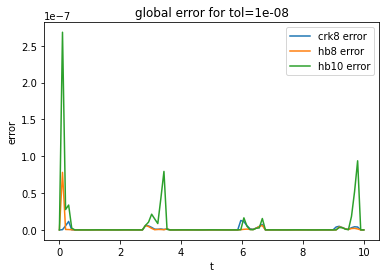

0.0
2.7645037816012227e-19
6.776263578034403e-19
4.0657581468206416e-19
1.2197274440461925e-18
4.174178364069192e-18
2.272054072660623e-15
9.637178208232733e-13
3.802694548138419e-10
2.113020140803723e-10
8.795557338014959e-11
3.236221707281217e-11
1.691155285254986e-09
9.595319400146352e-10
1.7788941708563044e-09
2.288652212190101e-09
2.760168538173957e-09
3.2260240034887033e-09
3.6893845478669363e-09
4.150312649109367e-09
4.608530335126204e-09
5.0636995152508746e-09
5.515569279079813e-09
5.963837701461472e-09
1.6605780084333333e-09
4.6418996424435477e-10
1.3163686807260433e-10
3.9253988948217966e-11
1.3648748797834287e-11
6.605382907309831e-12
4.729605596054398e-12
4.296174527240737e-12
4.251154983592187e-12
4.31571445247414e-12
4.420463994847523e-12
4.5259906933381444e-12
4.628741834267203e-12
4.731659508649955e-12
4.832245714680994e-12
4.937827924322846e-12
5.0395243533785106e-12
5.156541860174002e-12
5.2552406870631785e-12
5.3616000528222685e-12
5.4640736379951704e-12
5.5562221490

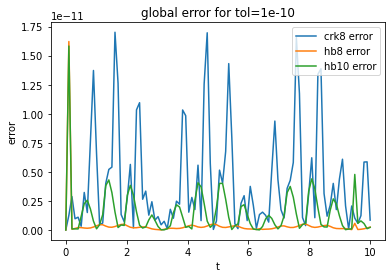

0.0
3.4430565816907224e-19
6.215633646070463e-19
1.4510733177650233e-19
5.869938324472301e-19
2.829090043829363e-19
3.049318610115481e-20
2.710505431213761e-20
3.903127820947816e-18
2.90132501357121e-16
1.364572517481566e-13
1.6259563140330613e-13
1.47272818940003e-13
1.1764200724684315e-13
8.822803598818041e-14
6.30745455865167e-14
4.330882874548081e-12
3.094066669540041e-12
1.6543016956305223e-12
7.787104294720848e-13
3.289729599842417e-13
1.1665668431248832e-13
1.9012569296705806e-14
2.030320356283255e-14
4.184153024056059e-14
5.140332604014475e-14
5.748179709996748e-14
6.536438057480609e-14
7.194245199571014e-14
7.83262343873048e-14
8.143485885625523e-14
8.892886427247504e-14
9.342526752220692e-14
9.539591339091658e-14
1.0047518372857667e-13
1.0613732115416497e-13
1.1621259510263826e-13
1.2090328738167955e-13
1.249000902703301e-13
1.3394840792102514e-13
1.3578027591165664e-13
1.4183099139586375e-13
1.4488410471358293e-13
1.4788170688007085e-13
1.4843681839238343e-13
1.5787371410169

In [18]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

In [ ]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

In [ ]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

In [ ]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

In [ ]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)